# Experimentación

In [1]:
import pandas as pd
from junifer.storage import HDF5FeatureStorage
import julearn
from julearn import run_cross_validation
from julearn import PipelineCreator
from julearn.utils import configure_logging

from julearn.model_selection import RepeatedContinuousStratifiedKFold

configure_logging(level="INFO")

2024-06-05 18:15:08,712 - julearn - INFO - ===== Lib Versions =====
2024-06-05 18:15:08,713 - julearn - INFO - numpy: 1.26.4
2024-06-05 18:15:08,714 - julearn - INFO - scipy: 1.11.4
2024-06-05 18:15:08,715 - julearn - INFO - sklearn: 1.3.2
2024-06-05 18:15:08,716 - julearn - INFO - pandas: 2.2.1
2024-06-05 18:15:08,717 - julearn - INFO - julearn: 0.3.2
2024-06-05 18:15:08,719 - julearn - INFO - ========================


In [2]:
storage = HDF5FeatureStorage("./features/ds003097_GMD/ds003097_GMD.hdf5")

In [3]:
storage.list_features()

{'881ac4e46fc343c867f102ceb674fdff': {'datagrabber': {'class': 'PatternDataladDataGrabber',
   'patterns': {'VBM_GM': {'pattern': 'derivatives/fmriprep/{subject}/anat/{subject}_space-MNI152NLin2009cAsym_label-GM_probseg.nii.gz',
     'space': 'MNI152NLin2009cAsym'}},
   'replacements': ['subject'],
   'confounds_format': None,
   'types': ['VBM_GM'],
   'uri': 'https://github.com/OpenNeuroDatasets/ds003097.git',
   'datalad_dirty': False,
   'datalad_commit_id': '47f030747dbaf492acd9f9624528aef8d51d8bd9',
   'datalad_id': 'aefe5438-e93b-11ea-ad4c-8e2245da6db7'},
  'dependencies': {'nilearn': '0.10.2', 'numpy': '1.26.4'},
  'datareader': {'class': 'DefaultDataReader'},
  'type': 'VBM_GM',
  'marker': {'class': 'ParcelAggregation',
   'parcellation': ['Schaefer400x7'],
   'method': 'mean',
   'method_params': {},
   'masks': None,
   'name': 'Schaefer400x7_Mean',
   'time_method': None,
   'time_method_params': {}},
  '_element_keys': ['subject'],
  'name': 'VBM_GM_Schaefer400x7_Mean'},


In [4]:
df =storage.read_df("VBM_GM_Shen_2019_368_Mean")

In [5]:
df_demografics = pd.read_csv("./data/participants.tsv", sep="\t")
df_demografics.rename(columns={"participant_id": "subject"}, inplace=True)

In [6]:
df.columns = df.columns.astype("str")
X = list(df.columns)
df_full = df.merge(df_demografics, on="subject")
df_full.dropna(inplace=True, subset=['IST_fluid', 'IST_memory', 'IST_crystallised', 'IST_intelligence_total'])
targets = ["IST_fluid", "IST_crystallised", "IST_memory"]

Separamos 10% de los datos para validación antes de entrenar los modelos

In [7]:
df_full.shape

(926, 399)

In [8]:
df_holdout = df_full.sample(frac=0.1, random_state=42)
df_holdout

,subject,1,2,3,4,5,6,7,8,9,...,sexual_attraction_M,sexual_attraction_F,gender_identity_M,gender_identity_F,religious_upbringing,religious_now,religious_importance,DWI_TR_run1,DWI_TR_run2,DWI_TR_run3
323,sub-0635,0.514908,0.549903,0.541406,0.514765,0.511887,0.491396,0.350862,0.424827,0.382222,...,2.0,6.0,2.0,5.0,no,no,NaN,6.311,6.311,6.311
601,sub-0503,0.499974,0.517306,0.542209,0.448822,0.534981,0.555862,0.335824,0.477757,0.425338,...,NaN,NaN,NaN,NaN,no,no,NaN,6.374,6.374,6.374
30,sub-0345,0.471175,0.525356,0.554896,0.375051,0.439218,0.536979,0.408894,0.317275,0.409072,...,6.0,2.0,1.0,7.0,no,no,NaN,6.311,6.311,6.311
825,sub-0454,0.439163,0.518745,0.521907,0.395653,0.479172,0.579434,0.410290,0.376543,0.459646,...,NaN,NaN,NaN,NaN,yes,no,NaN,6.311,6.312,6.312
294,sub-0249,0.472178,0.506438,0.519168,0.394832,0.499193,0.560724,0.370891,0.387456,0.417400,...,NaN,NaN,NaN,NaN,yes,no,NaN,6.312,6.313,6.313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,sub-0850,0.486701,0.535969,0.556655,0.462936,0.508814,0.489372,0.365765,0.435467,0.395467,...,7.0,2.0,1.0,7.0,no,no,NaN,6.311,6.311,6.311
60,sub-0404,0.524086,0.561566,0.661606,0.478921,0.557874,0.559515,0.413938,0.435262,0.482556,...,7.0,1.0,2.0,5.0,yes,no,NaN,6.374,6.374,6.374
803,sub-0222,0.372856,0.496878,0.523030,0.448043,0.455269,0.459995,0.351385,0.392032,0.408869,...,1.0,7.0,7.0,1.0,yes,no,NaN,6.311,6.311,6.311
660,sub-0709,0.564245,0.578342,0.601177,0.491050,0.482314,0.565333,0.416673,0.493292,0.427446,...,NaN,NaN,NaN,NaN,no,no,NaN,6.311,6.312,6.312


In [9]:
# separate holdset from training set
df_full.drop(df_holdout.index, inplace=True)
df_full.shape

(833, 399)

### Correlación entre los targets

<Axes: >

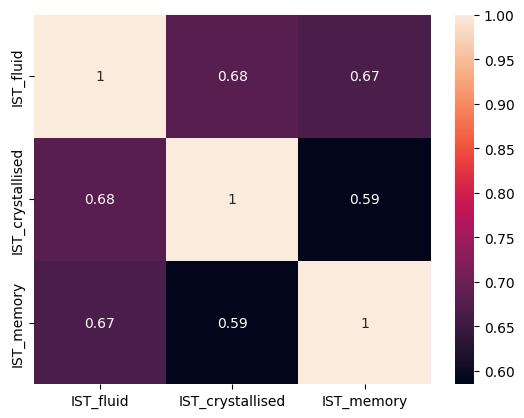

In [10]:
#correlation map of the 3 features to predict. IST_fluid, IST_crystallised, IST_memory
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df_full[targets].corr(), annot=True)

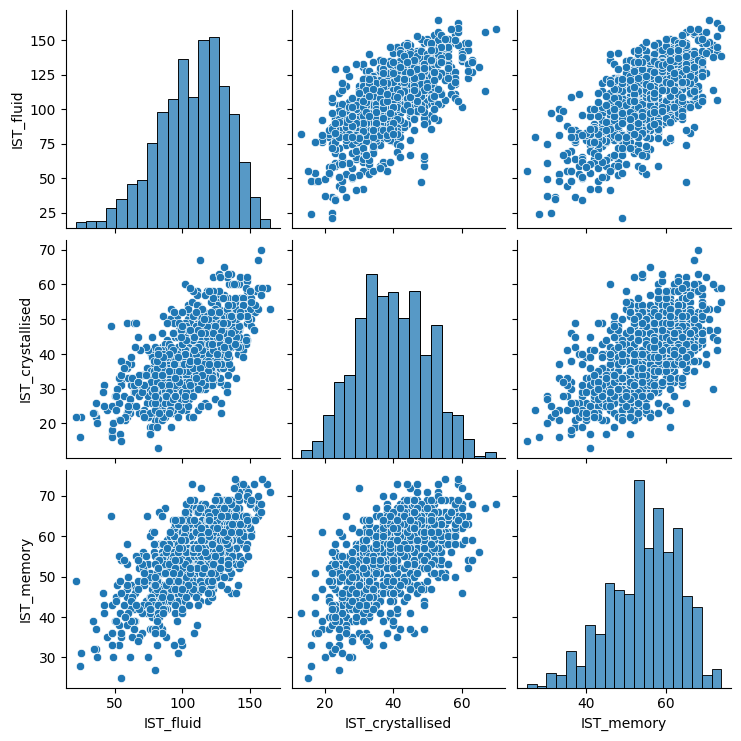

In [11]:
# Pairplot of the 3 features to predict. Correlation and distribution of the targets
sns.pairplot(df_full[["IST_fluid", "IST_crystallised", "IST_memory"]])

### Entrenamiento

In [12]:
cv = RepeatedContinuousStratifiedKFold(3, n_splits=3, n_repeats=10, random_state=42)

In [13]:
search_params = {
    "kind": "bayes",
    "n_iter": 50,
    # "cv": 3
}

# Model 1 (SVM)
creator1 = PipelineCreator(problem_type="regression")
creator1.add("zscore")
creator1.add("svm",
             kernel="linear",
             C=(1e-6, 1, "log-uniform"),
             epsilon=(0.01, 3, "log-uniform")
            )

creator2 = PipelineCreator(problem_type="regression")
creator2.add("zscore")
creator2.add("svm", 
             kernel=["rbf", "sigmoid"],
             C=(1e-6, 1, "log-uniform"),
             gamma=[1e-5, 1e-4, 1e-3, 1e-2, "scale", "auto"],
             epsilon=(0.01, 3, "log-uniform")
            )

# Model 2 (Random Forest)
creator3 = PipelineCreator(problem_type="regression")
creator3.add("zscore")
creator3.add("rf", n_estimators=[25, 50, 100], max_depth=[5, 10, 20])

# Model 3 (Gradient Boosting)
creatorXG = PipelineCreator(problem_type="regression")
creatorXG.add("zscore")
creatorXG.add("gradientboost", n_estimators=[25, 50, 100], max_depth=[3, 5, 10], random_state=42)

# Model 4 (Dummy)
dummy_creator = PipelineCreator(problem_type="regression")
dummy_creator.add("zscore")
dummy_creator.add("dummy")

2024-06-05 18:15:11,663 - julearn - INFO - Adding step zscore that applies to ColumnTypes<types={'continuous'}; pattern=(?:__:type:__continuous)>
2024-06-05 18:15:11,666 - julearn - INFO - Step added
2024-06-05 18:15:11,669 - julearn - INFO - Adding step svm that applies to ColumnTypes<types={'continuous'}; pattern=(?:__:type:__continuous)>
2024-06-05 18:15:11,670 - julearn - INFO - Setting hyperparameter kernel = linear
2024-06-05 18:15:11,672 - julearn - INFO - Tuning hyperparameter C = (1e-06, 1, 'log-uniform')
2024-06-05 18:15:11,673 - julearn - INFO - Tuning hyperparameter epsilon = (0.01, 3, 'log-uniform')
2024-06-05 18:15:11,674 - julearn - INFO - Step added
2024-06-05 18:15:11,676 - julearn - INFO - Adding step zscore that applies to ColumnTypes<types={'continuous'}; pattern=(?:__:type:__continuous)>
2024-06-05 18:15:11,677 - julearn - INFO - Step added
2024-06-05 18:15:11,679 - julearn - INFO - Adding step svm that applies to ColumnTypes<types={'continuous'}; pattern=(?:__:typ

In [14]:
scores_dict = {t: {} for t in targets}
model_dict = {t: {} for t in targets}
inspector_dict = {t: {} for t in targets}

models = {'SVM': [creator1, creator2], 'RF': creator3, 'XGBoost': creatorXG, 'Dummy': dummy_creator}

### Visualización

In [15]:
from julearn.viz import plot_scores

In [16]:
for y in targets:
    for m_name, m in models.items():
        scores, model, inspector = run_cross_validation(
            X=X,
            y=y,
            data=df_full,
            model= m,
            return_train_score=True,
            return_inspector=True,
            cv=cv,
            scoring="neg_mean_absolute_error",
            search_params=search_params,
        )
        scores['model'] = m_name
        scores_dict[y][m_name] = scores
        model_dict[y][m_name] = model
        inspector_dict[y][m_name] = inspector

2024-06-05 18:15:12,714 - julearn - INFO - Inspector requested: setting return_estimator='all'
2024-06-05 18:15:12,716 - julearn - INFO - ==== Input Data ====
2024-06-05 18:15:12,717 - julearn - INFO - Using dataframe as input
2024-06-05 18:15:12,718 - julearn - INFO - 	Features: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', 

/home/lucas/miniconda3/envs/neurodc/lib/python3.11/site-packages/julearn/prepare.py:505: RuntimeWarning: The following columns are not defined in X_types: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', 

2024-06-05 18:15:12,764 - julearn - INFO - ====================
2024-06-05 18:15:12,766 - julearn - INFO - 
2024-06-05 18:15:12,769 - julearn - INFO - = Model Parameters =
2024-06-05 18:15:12,770 - julearn - INFO - Tuning hyperparameters using bayes
2024-06-05 18:15:12,771 - julearn - INFO - Hyperparameters:
2024-06-05 18:15:12,772 - julearn - INFO - 	svm__C: (1e-06, 1, 'log-uniform')
2024-06-05 18:15:12,773 - julearn - INFO - 	svm__epsilon: (0.01, 3, 'log-uniform')
2024-06-05 18:15:12,775 - julearn - INFO - Hyperparameter svm__C as is (1e-06, 1, 'log-uniform')
2024-06-05 18:15:12,776 - julearn - INFO - Hyperparameter svm__epsilon as is (0.01, 3, 'log-uniform')
2024-06-05 18:15:12,778 - julearn - INFO - Using inner CV scheme KFold(n_splits=5, random_state=None, shuffle=False)
2024-06-05 18:15:12,779 - julearn - INFO - Search Parameters:
2024-06-05 18:15:12,780 - julearn - INFO - 	n_iter: 50
2024-06-05 18:15:12,782 - julearn - INFO - 	cv: KFold(n_splits=5, random_state=None, shuffle=Fal

/home/lucas/miniconda3/envs/neurodc/lib/python3.11/site-packages/julearn/prepare.py:505: RuntimeWarning: The following columns are not defined in X_types: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', 

2024-06-05 19:42:59,964 - julearn - INFO - ====================
2024-06-05 19:42:59,965 - julearn - INFO - 
2024-06-05 19:42:59,967 - julearn - INFO - = Model Parameters =
2024-06-05 19:42:59,968 - julearn - INFO - Tuning hyperparameters using bayes
2024-06-05 19:42:59,969 - julearn - INFO - Hyperparameters:
2024-06-05 19:42:59,970 - julearn - INFO - 	rf__n_estimators: [25, 50, 100]
2024-06-05 19:42:59,971 - julearn - INFO - 	rf__max_depth: [5, 10, 20]
2024-06-05 19:42:59,972 - julearn - INFO - Hyperparameter rf__n_estimators as is [25, 50, 100]
2024-06-05 19:42:59,973 - julearn - INFO - Hyperparameter rf__max_depth as is [5, 10, 20]
2024-06-05 19:42:59,974 - julearn - INFO - Using inner CV scheme KFold(n_splits=5, random_state=None, shuffle=False)
2024-06-05 19:42:59,976 - julearn - INFO - Search Parameters:
2024-06-05 19:42:59,977 - julearn - INFO - 	n_iter: 50
2024-06-05 19:42:59,986 - julearn - INFO - 	cv: KFold(n_splits=5, random_state=None, shuffle=False)
2024-06-05 19:42:59,994 

/home/lucas/miniconda3/envs/neurodc/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [5, 100] before, using random point [5, 25]
  warnings.warn(
/home/lucas/miniconda3/envs/neurodc/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [20, 100] before, using random point [5, 50]
  warnings.warn(
/home/lucas/miniconda3/envs/neurodc/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [20, 100] before, using random point [5, 50]
  warnings.warn(
/home/lucas/miniconda3/envs/neurodc/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [20, 100] before, using random point [10, 50]
  warnings.warn(
/home/lucas/miniconda3/envs/neurodc/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been e

In [ ]:
for y in targets:
    for est in scores_dict[y]['SVM'].estimator:
        print("=================== " + y + " ======================")
        display(est.best_params_)

{'set_column_types': SetColumnTypes(X_types={}),
 'svm': SVR(),
 'svm__C': 1,
 'svm__epsilon': 0.01,
 'svm__gamma': 'auto',
 'svm__kernel': 'sigmoid',
 'zscore': StandardScaler()}

{'set_column_types': SetColumnTypes(X_types={}),
 'svm': SVR(),
 'svm__C': 1,
 'svm__epsilon': 3,
 'svm__gamma': 'auto',
 'svm__kernel': 'sigmoid',
 'zscore': StandardScaler()}

{'set_column_types': SetColumnTypes(X_types={}),
 'svm': SVR(),
 'svm__C': 1,
 'svm__epsilon': 0.01,
 'svm__gamma': 'scale',
 'svm__kernel': 'sigmoid',
 'zscore': StandardScaler()}

{'set_column_types': SetColumnTypes(X_types={}),
 'svm': SVR(),
 'svm__C': 1,
 'svm__epsilon': 3,
 'svm__gamma': 'auto',
 'svm__kernel': 'sigmoid',
 'zscore': StandardScaler()}

{'set_column_types': SetColumnTypes(X_types={}),
 'svm': SVR(),
 'svm__C': 1,
 'svm__epsilon': 3,
 'svm__gamma': 'auto',
 'svm__kernel': 'sigmoid',
 'zscore': StandardScaler()}

In [ ]:
for y in targets:
    holdout_pred1, holdout_pred2, holdout_pred3, holdout_pred4 = tuple(model_dict[y][m].predict(df_holdout[X]) for m in models)
    s1, s2, s3, s4 = tuple(scores_dict[y].values())
    panel = plot_scores(s1, s2, s3, s4)
    
    panel.show()

In [ ]:
# correlation scatter plot for the best model, predict vs ground truth
fig, ax = plt.subplots((2, 2), figsize=(10, 10))

for i, m_name in enumerate(models):
    y_true = df_holdout['IST_intelligence_total']
    y_pred_fluid = model_dict['IST_fluid'][m_name].predict(df_holdout[X])
    y_pred_memory = model_dict['IST_memory'][m_name].predict(df_holdout[X])
    y_pred_crystallised = model_dict['IST_crystallised'][m_name].predict(df_holdout[X])

    y_pred = y_pred_fluid + y_pred_memory + y_pred_crystallised

    ax[i//2][i%2] = sns.scatterplot(x=y_true, y=y_pred, alpha=0.5)
    ax[i//2][i%2].set_title(f"IST_intelligence_total vs {m_name} prediction")
    ax[i//2][i%2].set_xlabel("IST_intelligence_total")
    ax[i//2][i%2].set_ylabel("Prediction")
    ax[i//2][i%2].plot([0, 1], [0, 1], transform=ax[i//2][i%2].transAxes, color='red', linestyle='--')
    

In [ ]:
# from bokeh.plotting import figure, output_file, show

# # output to static HTML file
# output_file("line.html")

# p = figure(width=400, height=400)

# # add a circle renderer with a size, color, and alpha
# p.circle([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], size=20, color="navy", alpha=0.5)

# # show the results
# show(p)